# 데이터의 spectogram을 관찰하는 프로그램

In [9]:
import pandas as pd
from IPython.display import Audio, display
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [10]:
seed = 42
# seed = 123
# seed = 9903
sr = 32000
train_file = "train.csv"
test_file = "test.csv"

In [11]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
train_df.head(3)

,id,path,label
0,RUNQPNJF,./train/RUNQPNJF.ogg,real
1,JFAWUOGJ,./train/JFAWUOGJ.ogg,fake
2,RDKEKEVX,./train/RDKEKEVX.ogg,real


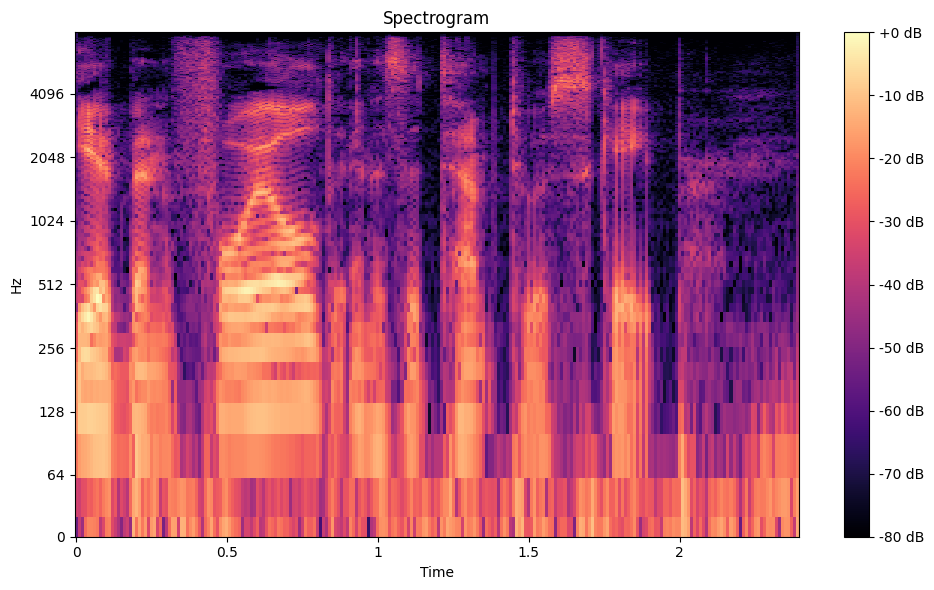

In [12]:
# OGG 파일 로드
filename = './train/RUNQPNJF.ogg'  # OGG 파일 경로를 지정하세요
y, sr = librosa.load(filename, sr=None)

# 프레임 크기와 홉 크기 설정
frame_size_ms = 25  # 프레임 크기를 25ms로 설정
hop_size_ms = 10    # 홉 크기를 10ms로 설정 (일반적으로 프레임의 40~50% 정도로 설정)

frame_size = int(sr * frame_size_ms / 1000)
hop_length = int(sr * hop_size_ms / 1000)

# 스펙트로그램 계산
S = librosa.stft(y, n_fft=frame_size, hop_length=hop_length, window='hann')
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

# 스펙트로그램 시각화
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.ylim([0, 8000])
plt.tight_layout()
plt.show()

In [13]:
train_sample_real_df = train_df[train_df['label'] == "real"].sample(n=5, random_state=seed)
train_sample_fake_df = train_df[train_df['label'] == "fake"].sample(n=5, random_state=seed)
test_sample_df = test_df.sample(n=5, random_state=seed)

## train real  
방음 환경에서의 진짜 사람 목소리와 가짜 생성 목소리   
각 샘플 당 한명의 목소리

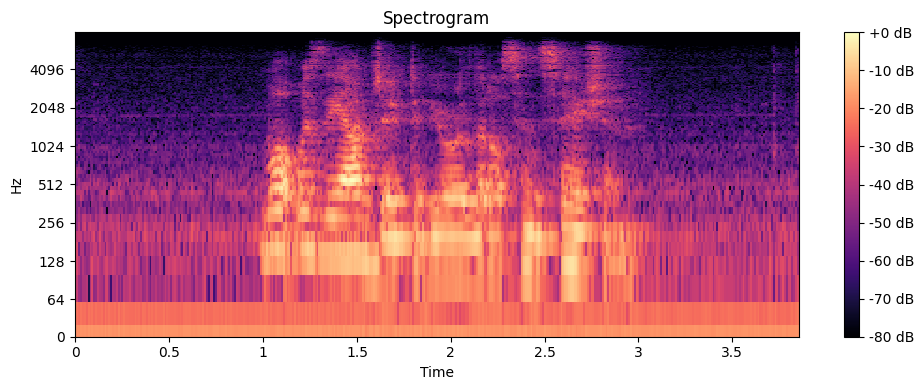

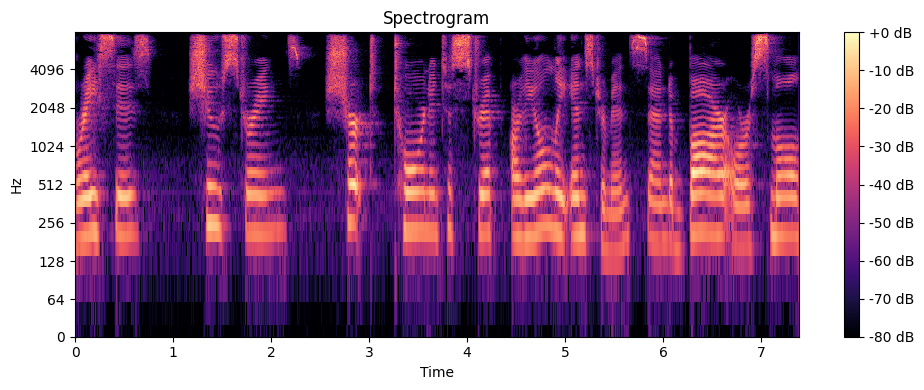

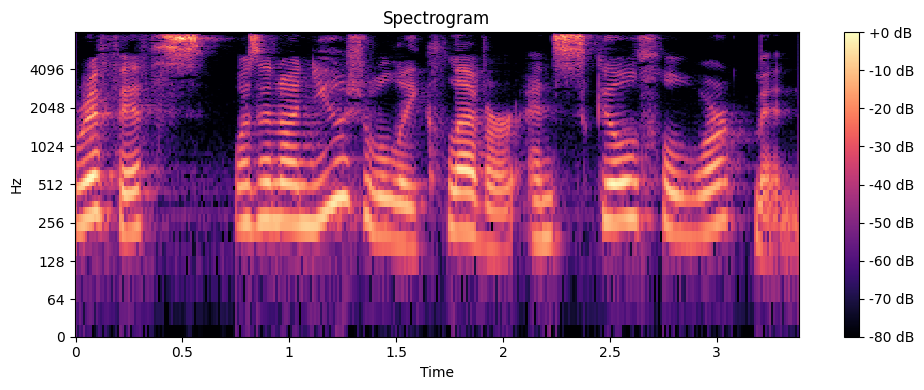

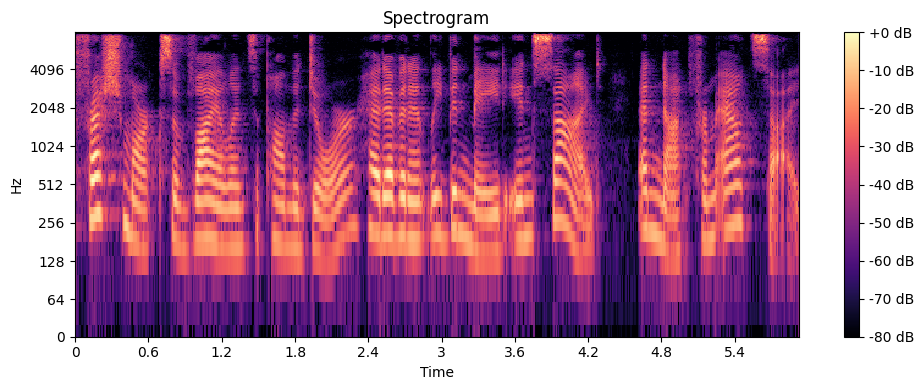

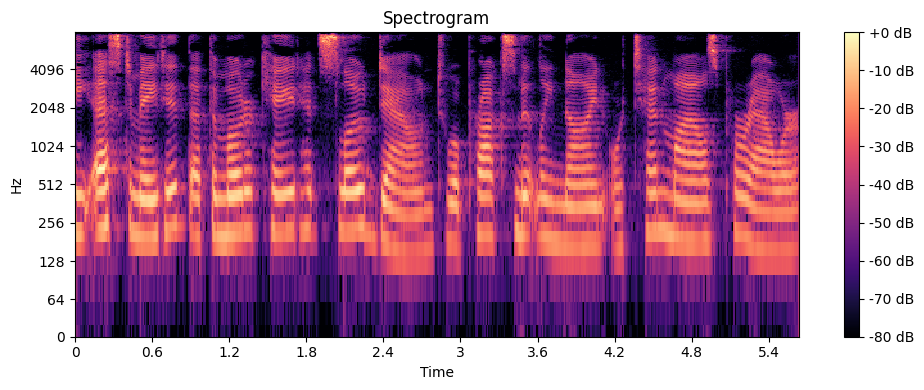

In [14]:
for index, row in train_sample_real_df.iterrows():
    # 음성 파일 로드
    filename = row['path']
    y, sr = librosa.load(filename, sr=sr)

    # 프레임 크기와 홉 크기 설정
    frame_size_ms = 25  # 프레임 크기를 25ms로 설정
    hop_size_ms = 10    # 홉 크기를 10ms로 설정 (일반적으로 프레임의 40~50% 정도로 설정)

    frame_size = int(sr * frame_size_ms / 1000)
    hop_length = int(sr * hop_size_ms / 1000)

    # 스펙트로그램 계산
    S = librosa.stft(y, n_fft=frame_size, hop_length=hop_length, window='hann')
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    # 스펙트로그램 시각화
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.ylim([0, 8000])
    plt.tight_layout()
    plt.show()

## train fake

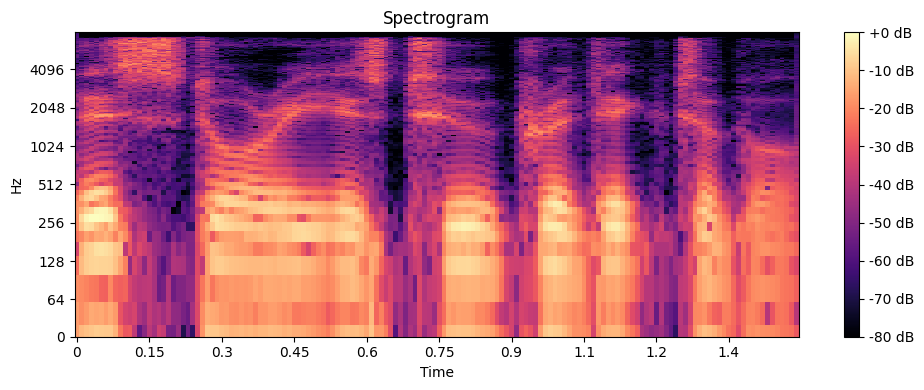

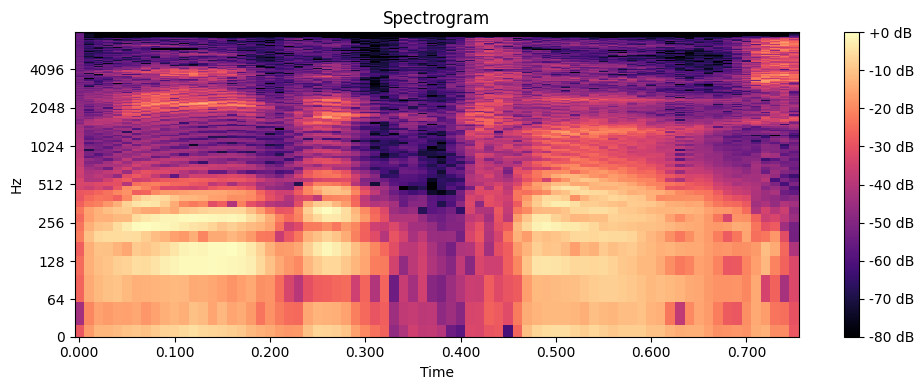

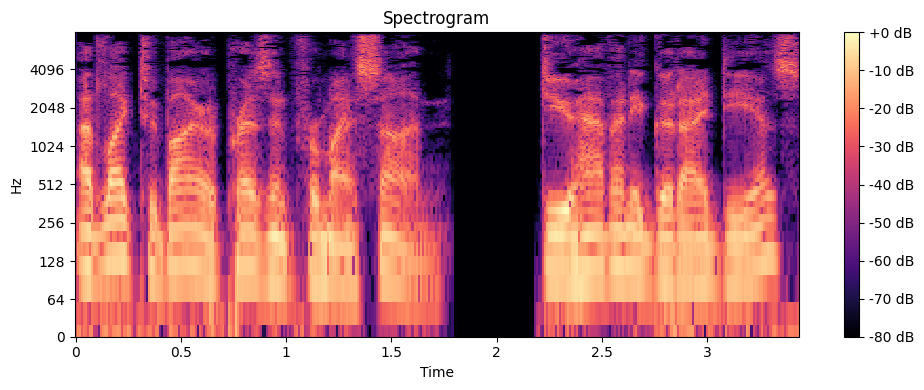

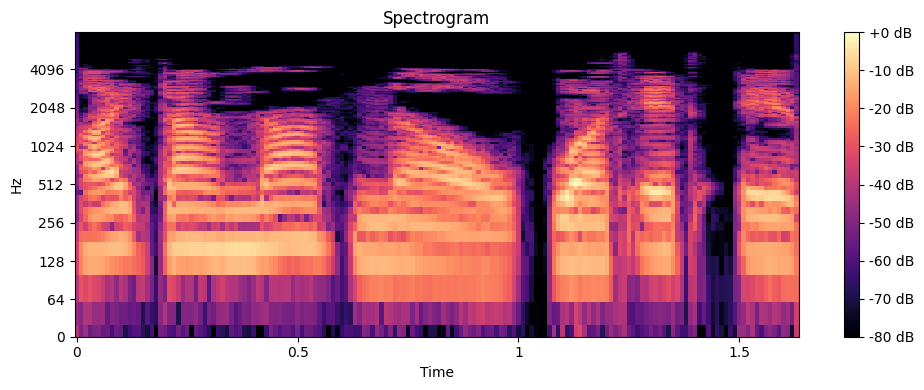

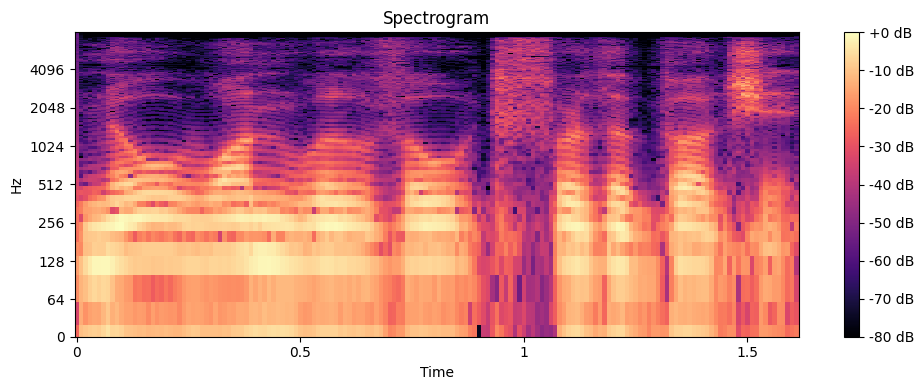

In [16]:
for index, row in train_sample_fake_df.iterrows():
    # 음성 파일 로드
    filename = row['path']
    y, sr = librosa.load(filename, sr=sr)

    # 프레임 크기와 홉 크기 설정
    frame_size_ms = 25  # 프레임 크기를 25ms로 설정
    hop_size_ms = 10    # 홉 크기를 10ms로 설정 (일반적으로 프레임의 40~50% 정도로 설정)

    frame_size = int(sr * frame_size_ms / 1000)
    hop_length = int(sr * hop_size_ms / 1000)

    # 스펙트로그램 계산
    S = librosa.stft(y, n_fft=frame_size, hop_length=hop_length, window='hann')
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

    # 스펙트로그램 시각화
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.ylim([0, 8000])
    plt.tight_layout()
    plt.show()

## test
5초 분량   
방음 환경/그렇지 않은 환경(배경음악이 있다)   
최대 2개의 목소리(둘 다 real이거나 fake)

In [17]:
# for index, row in test_sample_df.iterrows():
#     audio_file = row['path']
#     print(f"Playing audio file: {audio_file}")
#     display(Audio(audio_file))